This script identifies the intersection of significant comorbidities across clusters using an UpSet plot.
It helps visualize comorbidities that are significantly associated with specific clusters.

Key processes in this script:
1. **Generate a True/False mapping for each cluster**, indicating whether a comorbidity is significant in that cluster.  
   - **Input:** `Data/volcano_significant_c{i}_other_ICD10.csv`
2. **Create an UpSet plot** to illustrate the overlap of comorbidities across clusters.
3. **Output structure**: Each column represents a cluster (e.g., c0, c1, c2, etc.), with True/False values indicating  
   whether the comorbidity is significant in that cluster.
4. **Save processed data** for further analysis.  
   - **Output:** `Data/upset_AD_positive_ICD10.csv`

Additionally, a similar analysis will be performed for negatively associated comorbidities,  
identifying conditions that are significantly less frequent in specific clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

# Load Datasets

In [2]:
# volcano_c0_other_{n}.csv
df1 = pd.read_csv('Data/volcano_significant_c1_other_ICD10.csv')
df2 = pd.read_csv('Data/volcano_significant_c2_other_ICD10.csv')
df3 = pd.read_csv('Data/volcano_significant_c3_other_ICD10.csv')
df4 = pd.read_csv('Data/volcano_significant_c4_other_ICD10.csv')
df0 = pd.read_csv('Data/volcano_significant_c0_other_ICD10.csv')

In [3]:
df1['Cluster']=1
df2['Cluster']=2
df3['Cluster']=3
df4['Cluster']=4
df0['Cluster']=0

In [4]:
data = pd.concat([df0, df1, df2, df3, df4], axis=0)

In [5]:
# Filter for positive associations (X: log2_oddsratio)
data = data[data['X']>0]

In [6]:
data = data[['Label','Cluster','mapping']]

In [7]:
# Create a binary matrix for each cluster
data['value'] = 1  # Assign a value of 1 to indicate presence
pivot_df = data.pivot_table(index='Cluster', columns='Label', values='value', fill_value=0)

In [8]:
pivot_df.index = ["Cluster " + str(i)  for i in pivot_df.index]

In [9]:
pivot_df

Label,A04.7,A04.72,A04.8,A08.4,A08.8,A09,A15.0,A15.9,A41.50,A41.51,...,Z98.42,Z98.49,Z98.61,Z98.89,Z98.890,Z99.11,Z99.2,Z99.3,Z99.81,Z99.89
Cluster 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster 1,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cluster 2,0,1,1,0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
Cluster 3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,0,1,1,0
Cluster 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# UpSet Plot

In [10]:
from upsetplot import UpSet, from_contents

<Figure size 1000x600 with 0 Axes>

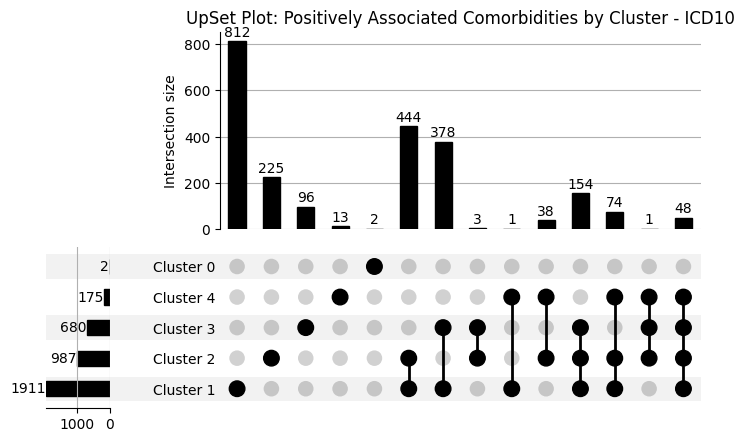

In [11]:
# Generate a True/False mapping for each cluster
contents = {}
for label, row in pivot_df.iterrows():
    clusters = row[row == 1].index.tolist()  # Get a list of cluster numbers
    contents[label] = clusters  # Store the cluster mapping for each label

# Generate data for the UpSet plot
upset_data = from_contents(contents)

plt.figure(figsize=(10, 6))  # Set a smaller figure size

# Draw the UpSet plot
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title('UpSet Plot: Positively Associated Comorbidities by Cluster - ICD10')
plt.show()


In [12]:
# Convert upset_data to a Pandas DataFrame
upset_df = upset_data.reset_index()

# Rename columns
upset_df.columns = ['c0', 'c1', 'c2', 'c3', 'c4', 'ICD']

In [13]:
upset_df.to_csv('Data/upset_AD_positive_ICD10.csv')